In [3]:
base_path = '/bigstore/binfo/mouse/Brain/Sequencing/Allen_10X_SmartSeqTypes/'
import os
loadings_fname= [i for i in os.listdir(base_path) if '_dpnmf_loadings.npy' in i]

In [9]:
import numpy as np
loadings_dict = {}
for fname in loadings_fname:
    loadings_dict[fname.split('_')[1]] = np.load(os.path.join(base_path,fname))

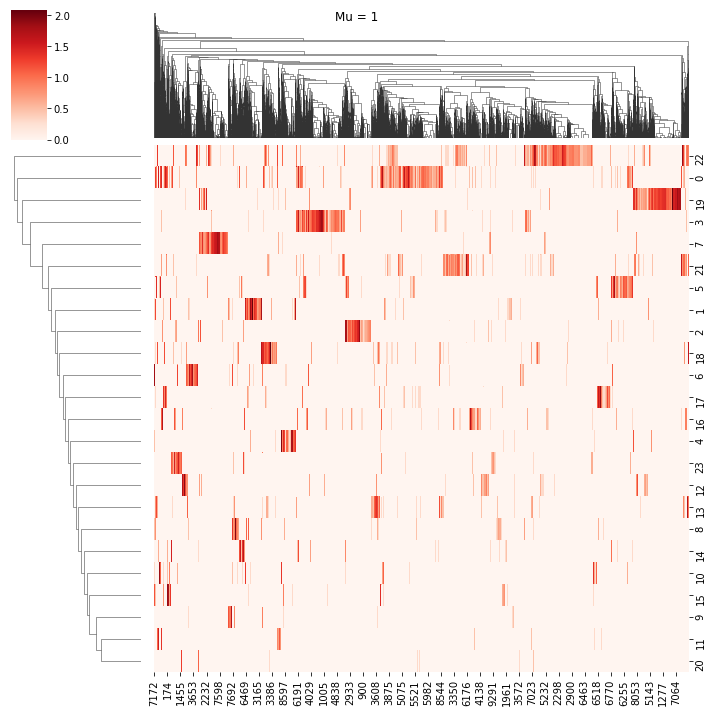

In [32]:
import sys
sys.setrecursionlimit(10000)
mu = '1'
probes = 120*loadings_dict[mu]/np.max(loadings_dict[mu],axis=1)[:,None]
probes = probes.astype(int)
g = sns.clustermap(np.log10(probes+1),cmap="Reds")
g.fig.suptitle('Mu = '+mu)
g
plt.show()

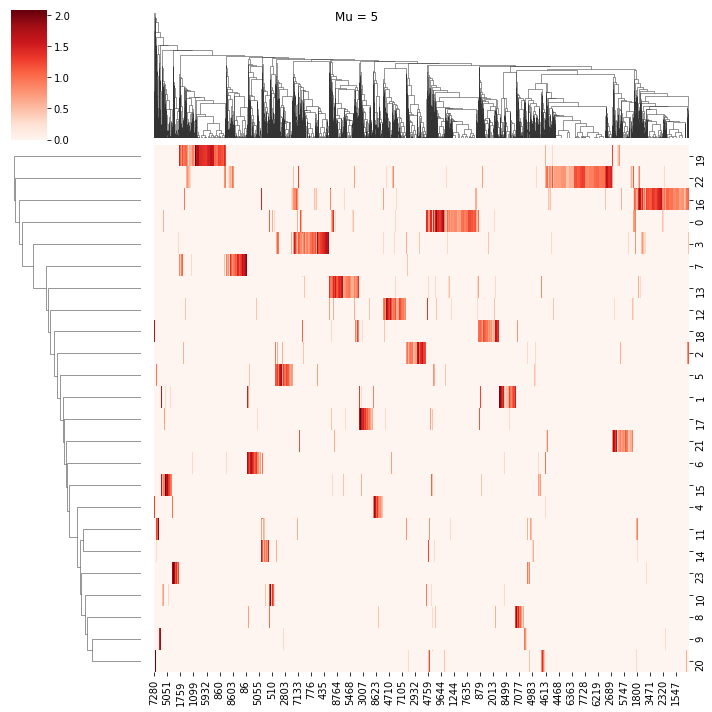

In [34]:
import sys
sys.setrecursionlimit(10000)
mu = '5'
probes = 120*loadings_dict[mu]/np.max(loadings_dict[mu],axis=1)[:,None]
probes = probes.astype(int)
g = sns.clustermap(np.log10(probes+1),cmap="Reds")
g.fig.suptitle('Mu = '+mu)
g
plt.show()

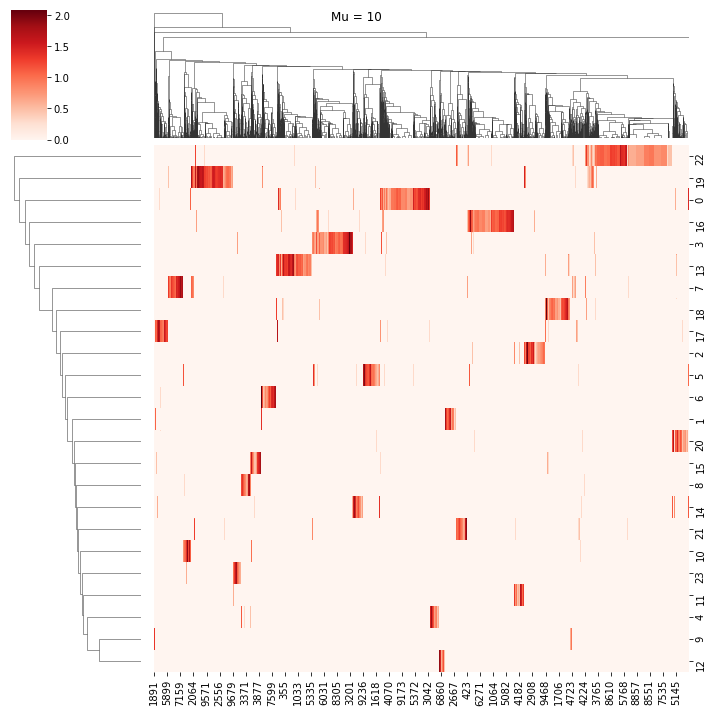

In [33]:
import sys
sys.setrecursionlimit(10000)
mu = '10'
probes = 120*loadings_dict[mu]/np.max(loadings_dict[mu],axis=1)[:,None]
probes = probes.astype(int)
g = sns.clustermap(np.log10(probes+1),cmap="Reds")
g.fig.suptitle('Mu = '+mu)
g
plt.show()

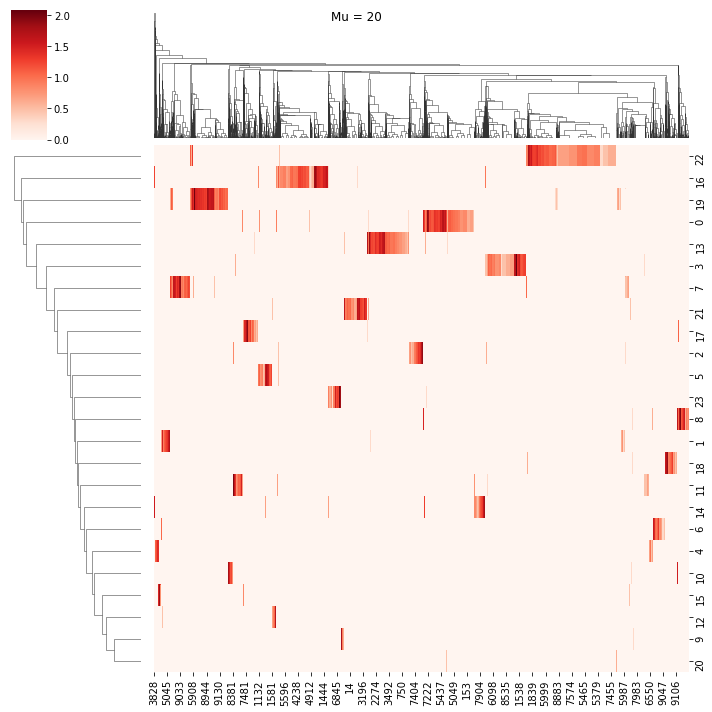

In [35]:
import sys
sys.setrecursionlimit(10000)
mu = '20'
probes = 120*loadings_dict[mu]/np.max(loadings_dict[mu],axis=1)[:,None]
probes = probes.astype(int)
g = sns.clustermap(np.log10(probes+1),cmap="Reds")
g.fig.suptitle('Mu = '+mu)
g
plt.show()

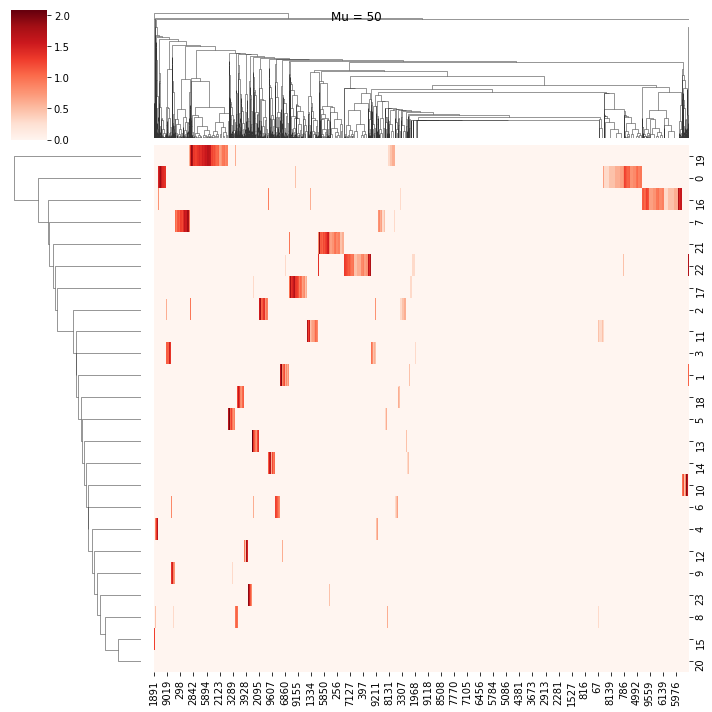

In [31]:
import sys
sys.setrecursionlimit(10000)
mu = '50'
probes = 120*loadings_dict[mu]/np.max(loadings_dict[mu],axis=1)[:,None]
probes = probes.astype(int)
g = sns.clustermap(np.log10(probes+1),cmap="Reds")
g.fig.suptitle('Mu = '+mu)
g
plt.show()

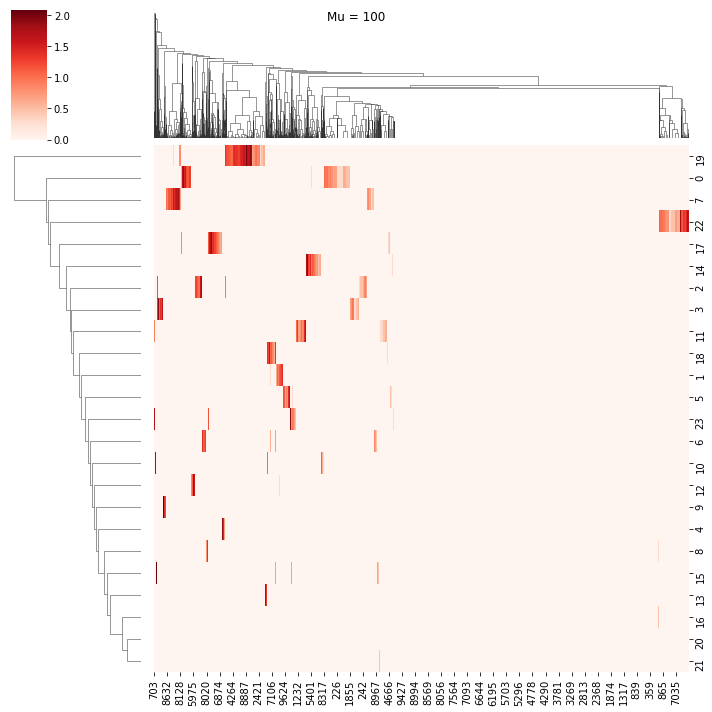

In [36]:
import sys
sys.setrecursionlimit(10000)
mu = '100'
probes = 120*loadings_dict[mu]/np.max(loadings_dict[mu],axis=1)[:,None]
probes = probes.astype(int)
g = sns.clustermap(np.log10(probes+1),cmap="Reds")
g.fig.suptitle('Mu = '+mu)
g
plt.show()

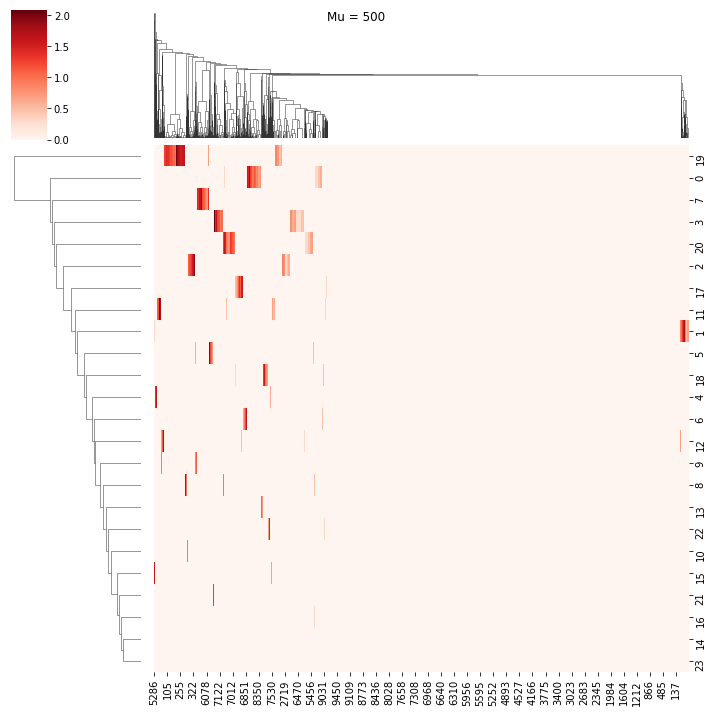

In [37]:
import sys
sys.setrecursionlimit(10000)
mu = '500'
probes = 120*loadings_dict[mu]/np.max(loadings_dict[mu],axis=1)[:,None]
probes = probes.astype(int)
g = sns.clustermap(np.log10(probes+1),cmap="Reds")
g.fig.suptitle('Mu = '+mu)
g
plt.show()

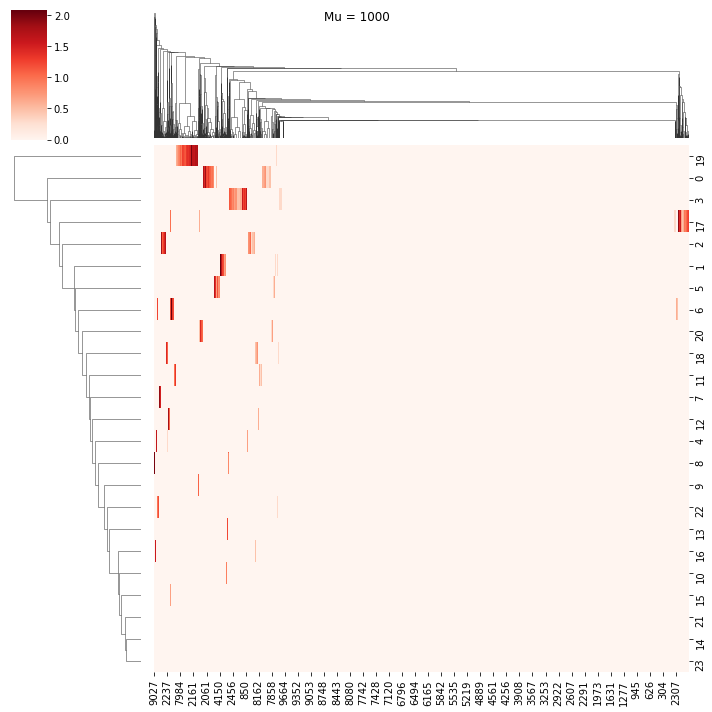

In [38]:
import sys
sys.setrecursionlimit(10000)
mu = '1000'
probes = 120*loadings_dict[mu]/np.max(loadings_dict[mu],axis=1)[:,None]
probes = probes.astype(int)
g = sns.clustermap(np.log10(probes+1),cmap="Reds")
g.fig.suptitle('Mu = '+mu)
g
plt.show()

In [78]:
mu = '50'
loadings = loadings_dict[mu]
probes = 120*loadings/np.max(loadings,axis=1)[:,None]
probes = probes.astype(int)
np.sum(np.max(probes,axis=0))

95251

In [40]:
p = np.max(probes,axis=0)
len(p[p>0])

6406

In [42]:
import pandas as pd
counts = np.load(os.path.join(base_path,'dredfish_normcounts.npy'))
genes = list(pd.read_csv(os.path.join(base_path,'dredfish_filtered_genes.csv'),index_col=0,header=None).index)
cells = list(pd.read_csv(os.path.join(base_path,'sorted_cells.csv'),index_col=0,header=None).index)
metadata = pd.read_csv(os.path.join(base_path,'sorted_metadata.csv'),index_col=0)
metadata['counts_loc'] = range(len(cells))
labels = np.array(list(metadata['cell_type_alias_label']))
celltypes = np.unique(labels)

/home/zach/miniconda3/envs/pyspots-gpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [60]:
from tqdm import tqdm
Gmu = np.zeros((len(genes),len(celltypes)))
for i,ct in tqdm(enumerate(celltypes),total=len(celltypes)):
    ct_indexes = list(metadata[metadata['cell_type_alias_label']==ct]['counts_loc'])
    if len(ct_indexes)>1:
        Gmu[:,i] = np.mean(counts[ct_indexes,:],axis=0)
    else:
        Gmu[:,i] = counts[ct_indexes,:]
Gmu_max = np.max(Gmu,axis=1)
Gsep = np.array([np.nanmean(np.abs(Gmu[i,:,None]-Gmu[i,None,:])) for i in tqdm(range(Gmu.shape[0]))])

100%|█████████▉| 373/374 [02:52<00:00,  2.16it/s]


ValueError: could not broadcast input array from shape (0,9711) into shape (9711)

In [62]:
Gmu_max = np.max(Gmu,axis=1)
Gsep = np.array([np.nanmean(np.abs(Gmu[i,:,None]-Gmu[i,None,:])) for i in tqdm(range(Gmu.shape[0]))])

100%|██████████| 9711/9711 [00:09<00:00, 1046.66it/s]


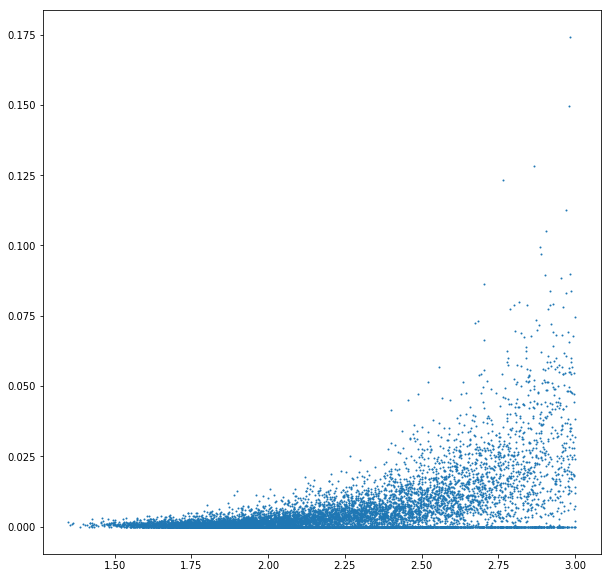

In [70]:
plt.figure(figsize=[10,10])
plt.scatter(np.log10(Gmu_max+1),np.log10(np.max(loadings,axis=0)+1),s=1)
plt.show()

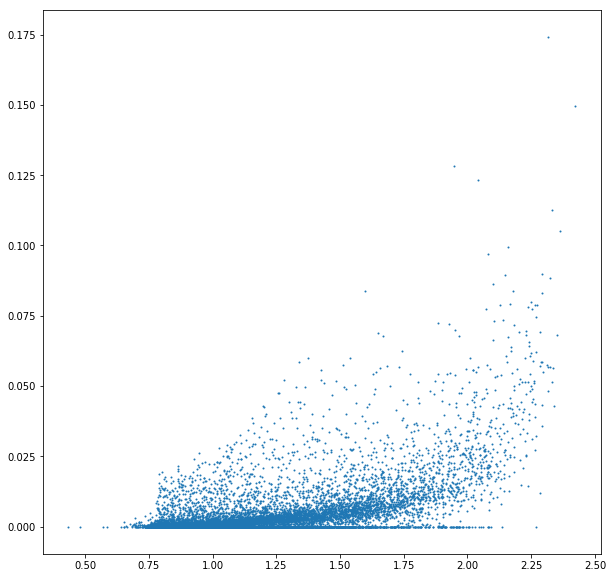

In [69]:
plt.figure(figsize=[10,10])
plt.scatter(np.log10(Gsep+1),np.log10(np.max(loadings,axis=0)+1),s=1)
plt.show()

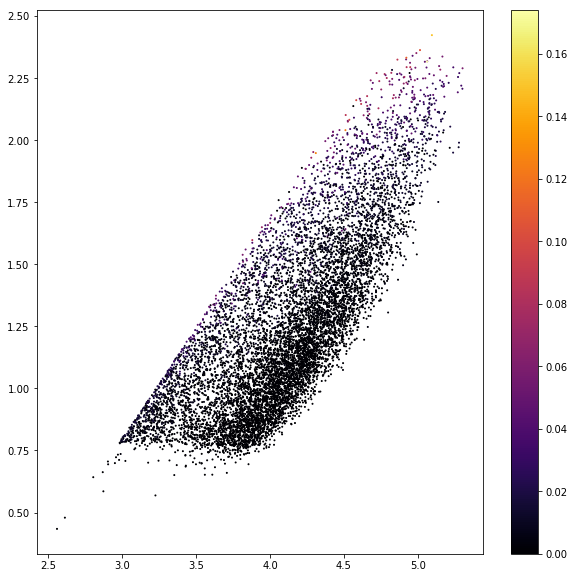

In [77]:
plt.figure(figsize=[10,10])
plt.scatter(np.log10(np.sum(Gmu,axis=1)+1),np.log10(Gsep+1),s=1,c=np.log10(np.max(loadings,axis=0)+1),cmap='inferno')
plt.colorbar()
plt.show()

In [80]:
# Class Balance
from tqdm import tqdm
unqtypes = [i for i in np.unique(labels) if not i=='nan']
n = 100
class_balanced = np.empty((len(unqtypes)*n,len(genes)))
balanced_labels = np.empty((len(unqtypes)*n)).astype(str)
for i,ct in tqdm(enumerate(unqtypes),total=len(unqtypes)):
    start = i*n
    end = (i+1)*n
    ct_indexes = np.where(np.array(labels)==ct)[0]
    if len(ct_indexes)>n:
        ct_indexes = np.random.choice(ct_indexes,n,replace=False)
    else:
        ct_indexes = np.random.choice(ct_indexes,n,replace=True)
    balanced_labels[start:end] = ct
    class_balanced[start:end,:] = counts[ct_indexes,:]

100%|██████████| 373/373 [00:48<00:00,  7.65it/s]


In [81]:
mu = '50'
loadings = loadings_dict[mu]
probes = 120*loadings/np.max(loadings,axis=1)[:,None]
probes = probes.astype(int)
np.sum(np.max(probes,axis=0))

95251

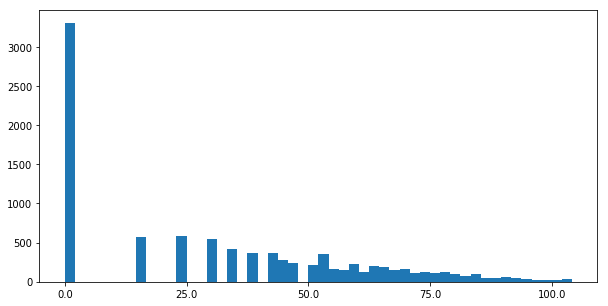

In [105]:
probes_per_gene = np.max(probes,axis=0)
plt.figure(figsize=[10,5])
plt.hist(np.log10(probes_per_gene+1),bins=50)
plt.xticks(np.linspace(0,2,num=5),labels=[round(i,2) for i in (np.linspace(0,100,num=5))])
plt.show()

In [82]:
compressed = np.matmul(class_balanced,probes.T)
reduced_types = np.unique([i.split('_')[1] for i in unqtypes])
reduced_balanced_labels = np.array([i.split('_')[1] for i in balanced_labels])

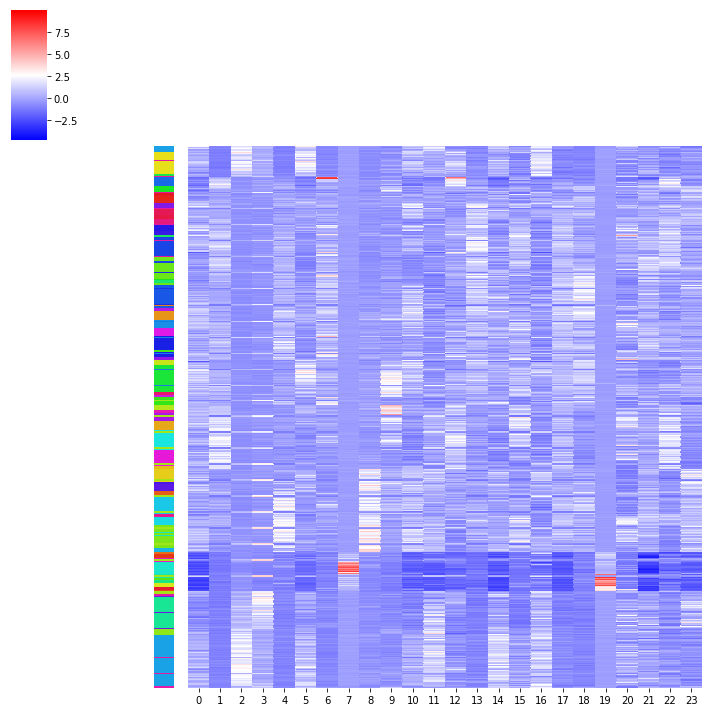

In [94]:
import seaborn as sns
import sys
sys.setrecursionlimit(10000)
lut = dict(zip(set(reduced_balanced_labels), sns.hls_palette(len(set(reduced_balanced_labels)), l=0.5, s=0.8)))
row_colors = pd.DataFrame(reduced_balanced_labels)[0].map(lut)
g=sns.clustermap(compressed, row_cluster=False,col_cluster=False, cmap='bwr',yticklabels=False, row_colors=[row_colors],z_score=1)
plt.show()

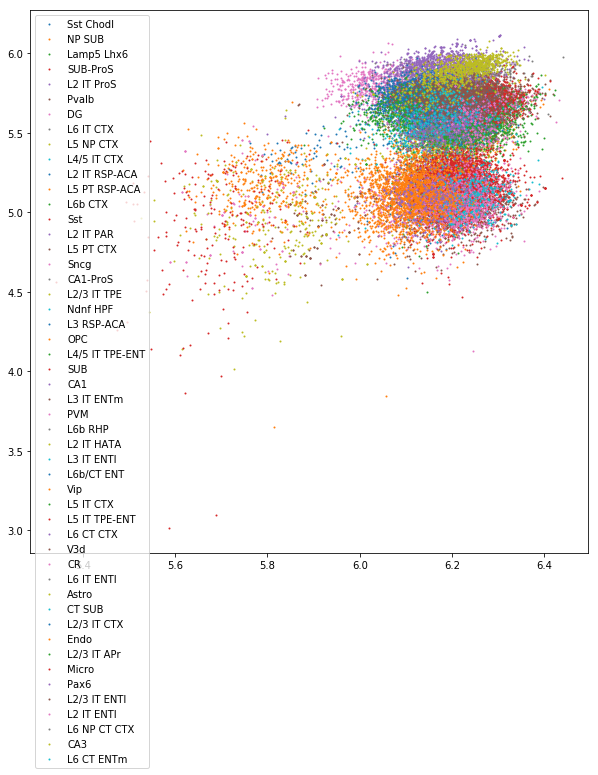

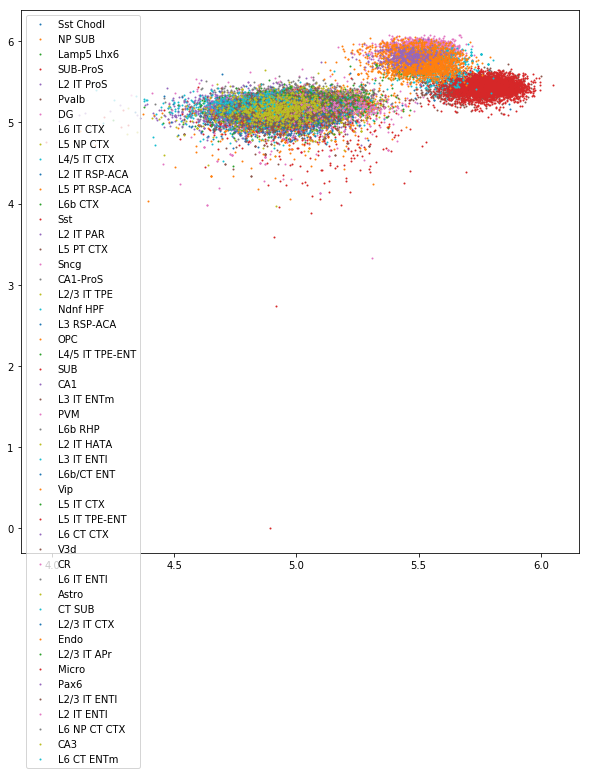

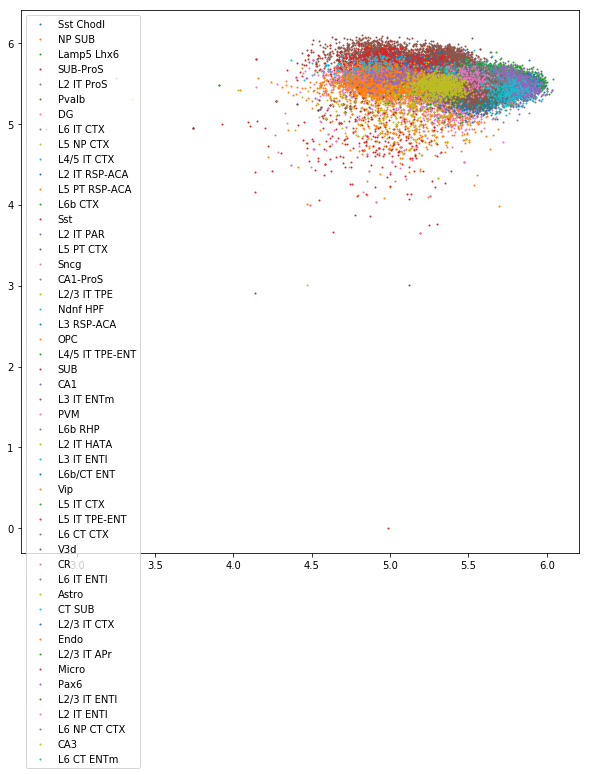

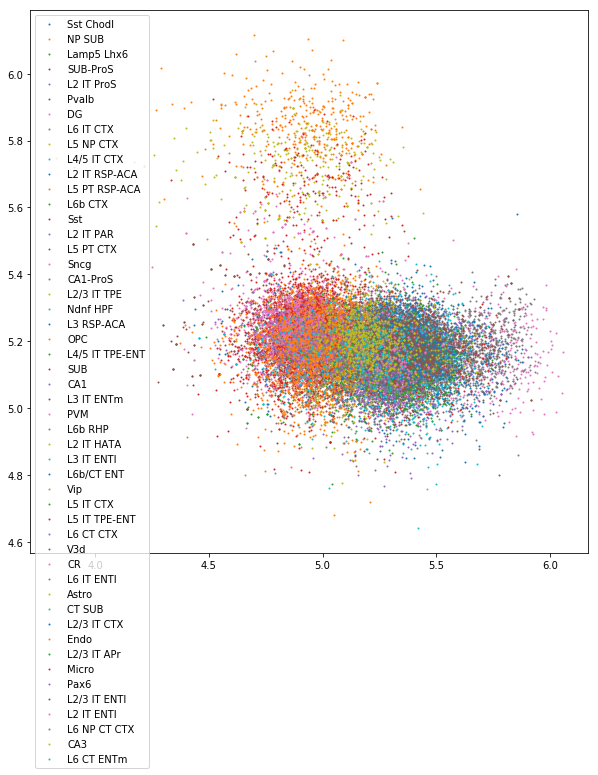

In [84]:
# View Compressed
plt.figure(figsize=[10,10])
random_types = np.random.choice(reduced_types,50,replace=False)
dim1 = 0
dim2 = 1
for ct in random_types:
    mask = reduced_balanced_labels==ct
    plt.scatter(np.log10(compressed[mask,dim1]+1),np.log10(compressed[mask,dim2]+1),s=1,label=ct)
plt.legend()
plt.show()
dim1 = 2
dim2 = 3
plt.figure(figsize=[10,10])
for ct in random_types:
    mask = reduced_balanced_labels==ct
    plt.scatter(np.log10(compressed[mask,dim1]+1),np.log10(compressed[mask,dim2]+1),s=1,label=ct)
plt.legend()
plt.show()
dim1 = 4
dim2 = 5
plt.figure(figsize=[10,10])
for ct in random_types:
    mask = reduced_balanced_labels==ct
    plt.scatter(np.log10(compressed[mask,dim1]+1),np.log10(compressed[mask,dim2]+1),s=1,label=ct)
plt.legend()
plt.show()
dim1 = 6
dim2 = 7
plt.figure(figsize=[10,10])
for ct in random_types:
    mask = reduced_balanced_labels==ct
    plt.scatter(np.log10(compressed[mask,dim1]+1),np.log10(compressed[mask,dim2]+1),s=1,label=ct)
plt.legend()
plt.show()